# About

[Triqler](https://pubmed.ncbi.nlm.nih.gov/30482846/) is a novel software for protein quantification and differential protein identification. It uses probabilistic graphical models to generate posterior distributions for fold changes between treatment groups, highlighting uncertainty rather than hiding it. Conventional (frequentist) methods use filters and imputations to control error rate and often ignore certain error sources. This project aims to benchmark Triqler against MaxQuant (A commonly used tool for protein quantification). 

For this purpose, a data set with 10 samples containing mixtures of Arabidopsis Thaliana, Caenorhabditis Elegans and Homo Sapiens proteins are used. The concentration levels are known. Theoretically, the results from Triqler should be more representative of the de facto protein quantification, since no filters or imputations methods are used, but previous attempts at showing this fact ([here](https://patruong.github.io/bayesProtQuant/)) have shown that imputation methods could severely impact the results obtained by MaxQuant, making it look either much worse or much better by giving it an unfair advantage or disadvantage. One important aspect of this research is therefore how to make a fair comparison of Triqler and MaxQuant. Sub-tasks to answer relating to this aspect is "How do we make a fair imputation if we need to impute values?" and "How do we visualize the comparison in a meaningful and comprehensible way?".



## Related studies and papers

[Integrated identification and quantification error probabilities for shotgun proteomics](https://www.biorxiv.org/content/10.1101/357285v2)

[Integrating identification and quantification uncertainty for differential protein abundance analysis with Triqler](https://www.biorxiv.org/content/10.1101/2020.09.24.311605v1?rss=1)

[A new era in proteomics: spectral library free data independent acquisition (directDIA)](https://theanalyticalscientist.com/fileadmin/tas/issues/App_Notes/05817-biognosys-app-note-supplied.pdf)

[Missing Value chapter of Course Handouts for Bayesian Data Analysis Class](https://bookdown.org/marklhc/notes_bookdown/missing-data.html)

[A foray into Bayesian handling of missing data](http://srmart.in/a-foray-into-bayesian-handling-of-missing-data/)

## ToDO:
- make a write-up about details about the projects.

## Historical log
https://patruong.github.io/bayesProtQuant/

## 2020-10-18 Sunday

Setting up a Rmarkdown log for this project. 


## 2020-10-19 Monday

### Starting up again. 

I just started checking into this project again. Let's start from scratch to get this correct from start. I will check through all the mails related to this.

Annotations that is good to know:
- PG - Protein Group.
- EG - Elution Group (modified peptide, including charge state).
- FG - Fragment Group (modified peptide, including charge state).

/data/Headers.xlsx - contains column info.

R.FileName is the columns for MS-measurement

### Old mail containing relevant information.

All the data is on bose:/media/hdd/matthew/mergespec/data/spectronaut/
The files from the latest try are named PSSS3_triqler_input_renormalized.tsv (triqler input file) and PSSS3_triqler_output_proteins.<x>vs<y>.tsv

The script I used for converting the spectronaut files (they have an xls extension, but they're actually just tab separated files): https://github.com/statisticalbiotechnology/mergespec/blob/master/bin/bayesquant/convert_spectronaut_to_triqler_input.py

The version of triqler I used to generate the data is on a branch called large_scale_optimizations: https://github.com/statisticalbiotechnology/triqler/tree/large_scale_optimizations
However, I'm not entirely sure if this is the same version that I used to generate the files, since I made some changes while working on this. So, if you run triqler yourself with this branch the results might be different. 

Some issues I had to generate a report comparing Triqler to Spectronaut were:
1. we either have their original results (500-PSSS3-precursor_Report.xls), which has a column "PG.Quantity" that contain the protein concentrations, but has missing values as it has been filtered on some FDR. Alternatively, we have their results with decoys ('S500-PSSS3-equ decoy_Report.xls'), which is not filtered on FDR and does not contain missing values, but does not contain a column with the protein quantity and I don't really know how they summarized peptide quantities to protein quantities. The first option seems more reasonable, as this is what they would normally report.
2. with these original results, we have to choose a missing value strategy and this will most likely give them either an unfair disadvantage (impute row average) or an unfair advantage (impute lowest observed value). Imputing the lowest observed value seems to be most in line with the DIA approach and I already created a file with protein concentrations using this strategy (500-PSSS3-precursor_Report.proteins.tsv) which could be useful. For the Triqler results, you can use any of the PSSS3_triqler_output_proteins.<x>vs<y>.tsv (the columns we'll use don't change for different <x> and <y>) and take the columns starting with "S01:S01_R01".

Future steps:
- Sort the proteins by pearson correlation(?) between the true concentrations and predicted concentrations and create graph with the correlation on the x-axis and the number of proteins on the y-axis. Note that the protein concentrations for spectronaut are not log2 transformed, whereas the Triqler protein concentrations are log2 transformed. Also, note that the Triqler results include proteins with high identification PEP, we thus might want to filter the list of proteins on e.g. 1% protein-identification FDR. This should all be relatively easy to do.
- Check if the value of the lowest observed imputed value for the spectronaut data (currently 139.428100585938) matters, since it will most likely affect the pearson correlation, especially if we do a log2 transformation first.
- Check the influence of the number of allowed missing values. The spectronaut data does not seem to include a limit for the number of missing values, while I think I allowed up to 25 (out of 50 samples) missing values per peptide for Triqler. It's a bit hard to compare though, since the missing values for spectronaut would only work on protein level, whereas the missing values for triqler are on peptide level.

#### Correction to mail:
Small correction to the previous mail, I actually allowed up to 35 missing values for Triqler. The concentrations for the C Elegans were dropping off so fast that such a large number was necessary (https://github.com/statisticalbiotechnology/mergespec/blob/735ed743924fa705cb2c1f64509e5a1540add574/bin/bayesquant/calibration.py#L63).

Information about the normalization of the data:
It should have been normalized (locally over the RT gradient) based on the constant Arabidopsis background.

I have generated a new report with now global median normalized data (based on the identified peptides of the constant Arabidopsis background), but also added the unnormalized quantities.

Additionally, the data is FDR unfiltered. You can filter the data by PG.Qvalue (protein group FDR) and EG.Qvalue (Precursor FDR) to get only the filtered data.

And an equal number of decoy are present, can be selected by EG.IsDecoy column.

File: 500-PSSS3-equ decoy_Report-V2-raw-and-normal.zip

According to a exploratory heatmap on this mail the normalization of the data is fine. Although, I do not recall how a heatmap indicates fine normalization.

#### Some info about the data

The PG.Quantity is based on a mix of Top3 intense peptides and reproducibility of identification.

#### Answer too my question about FG.NormalizedMS2PeakArea = 1.0

My Question: "How should we interpret non-decoy peptides with FG.NormalizedMS2PeakArea = 1.0? The PG.Quantities for some of these that I have seen seems to be NaNs. For example like these FG.NormalizedMS2PeakArea."

alues of 1 can come from two sources:

In Spectronaut, small values for quantities (<1) are set to one, these arise from small noise peaks or from local normalization effects.

In both cases were the signals noise or close to noise.

It mostly arises due to the fact that the dynamic range of MS1 and MS2 are not necessarily the same.

In Spectronaut MS1 and MS2 information is used for identification and it can be that one layer is enough. So the quantitative information of the other layer can be very low.

### How to approach this problem from my current position.

I have lot of triqler output, but it is probabily better that i redo and generate new results since I am have forgotten how these was generated, which could cause further problems down the line.

Also, I just noted that the triqler has been updated has new output options for posterior distribution. 

One remaining question is still, how to we report NaNs for the Spectronaut results.

I should also ask my PI if the PSSS3 results from last year are still relevant. 

## 2020-10-20 Tuesday
### Thoughts about how to approach the problem.
The problem was that different imputation methods could severly skew the results. How I could go about this problem is to compare different imputation methods with the result of triqler and argue why the results are bad for spectronaut and good/ok for triqler in each case. E.g. with protein counts, with boxplots etc.

One problem was that triqler had "bad" results for samples where there where low or no samples, because then the protein intensity got close to the prior, which is based on empirical means (meaning that the intensities are much higher than they should be). We could truncate the results, but in a real world case we would not know the samples so we would not be able to remove the results. 

Things to do:
- Think about how the data would be generated in real case, and perform analysis based on this.
- Think about how to handle zero samples.

## 2020-11-06 Friday
### Data-dependent Acquisition and Data Independent Acquisition (DIA).
In data-dependent acquisition (DDA), a protein sample is digested into peptides, ionized and analyzed by mass spectrometry. Peptide signals that rise above a certain treshold (noise level) in a mass spectrum are selected for fragmentation, producing tandem mass spectra (MS/MS) that can be matched to spectra in a database. The mass spectrometer randomly samples peptides for fragmentation and is biased to pick those with strongest signal, which makes it problematic to reproducibly quantify low-abundance peptides (which could hold biological value).  

Data-independent acquisition is an approach to acquisition in Mass Spectrometry which fragments all peptides within a defined mass-to-charge (m/z) windows (as opposed to a select narrow window around "the strongest signal"). The analysis is repeated as the mass spectrometer marches up the full m/z range, which results in accurate peptide quantificaiton without being limited to profiling predefined peptied of interest.    

A potential drawback of the DIA is the existence of multiple peptides in an m/z window. The fragmentation of multiple peptides results in chimeric (multiplexed) spectra which are more complex than single peptide spectra. Procedures for deconvoluting these spectra are required. Two methods for DIA are (OpenSWATH)[https://pubmed.ncbi.nlm.nih.gov/24727770/] and (ISOQUANT)[https://www.nature.com/articles/nmeth.2767]. 

## 2020-11-09 Saturday

spectronautFile: ../data/500-PSSS3-raw-reformatted_dropna_dropdup_decoy_nonShared_again.csv
FDR_treshold: 0.01
Impute: None
Global_impute: False
    
triqlerFile: ../data/triqlerResults_largeScale_minSamp20_FC0_8_adjInt/proteins.XvsY.tsv
FDR_treshold: 0.01




In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

ModuleNotFoundError: No module named 'matplotlib'

In [4]:
def read_in_triqler_x_vs_y_data(filename):
    #filename = "proteins.1vs4.tsv"
    f = open(filename, "r")
    cols = f.readline().split("\n")[0].split("\t")
    n_cols = len(cols)
    vals = []
    for i in f:
        val = i.split("\n")[0].split("\t")[0:n_cols-1]
        peptides = i.split("\n")[0].split("\t")[n_cols-1:]
        val.append(";".join(peptides))
        vals.append(val)
    
    return pd.DataFrame(vals, columns = cols)  

In [5]:
# Readin spectronau
file_dir = "~/git/bayesMS/data/old_data_pickled/"
spectronaut = pd.read_pickle(file_dir + "spectronaut.pkl")
# Remove decoy
spectronaut["decoy"] = spectronaut.protein.str.strip().str[:5]
spectronaut = spectronaut[spectronaut["decoy"] != "decoy"]

In [6]:
# Readin triqler 

#triqler = pd.read_pickle("triqler.pkl")
file_dir = "/home/ptruong/git/bayesMS/data/triqlerResults_largeScale_minSamp20_FC0_8_adjInt/"
filename = "proteins.2vs6.tsv" 
triqler = read_in_triqler_x_vs_y_data(file_dir + filename)#Choose the sample
triqler["specie"] = triqler.protein.str.strip().str[-5:]
# Remove decoy
triqler["decoy"] = triqler.protein.str.strip().str[:5]
triqler = triqler[triqler["decoy"] != "decoy"]


In [10]:
species = ["ARATH", "HUMAN", "CAEEL"]
cols = spectronaut.columns[3:]
cols = pd.DataFrame(cols)

#Sample S02 
specie = 2
sample = 1 # +1 on the sample

max_nan = 0 # set the number of nan
species_spec = spectronaut[spectronaut["specie"] == species[specie]]
species_spec = species_spec.set_index("protein")
start_of_sample_spectronaut = range(2,52,5) # start of samples
sample_s = species_spec.ix[:, start_of_sample_spectronaut[sample]:start_of_sample_spectronaut[sample]+5]
sample_s # 4210
sample_s = sample_s[sample_s.isnull().sum(axis=1) <= max_nan]

sample_s["mean"] =  sample_s.mean(axis=1)
sample_s["median"] = sample_s.median(axis=1)
sample_s["min"] = sample_s.min(axis=1)
sample_s["max"] = sample_s.max(axis=1)



start_of_sample_triqler = range(6,52,5) # start of samples
species_triq = triqler[triqler["specie"] == species[specie]]
species_triq = species_triq.set_index("protein")
sample_t = species_triq.ix[:, start_of_sample_triqler[sample]:start_of_sample_triqler[sample]+5]
sample_t = sample_t.astype(float)

sample_t["mean"] =  sample_t.mean(axis=1)
sample_t["median"] = sample_t.median(axis=1)
sample_t["min"] = sample_t.min(axis=1)
sample_t["max"] = sample_t.max(axis=1)

#reindex sample_t
rename_idx = dict(zip(sample_t.index, sample_t.index.str.strip().str[:-6]))
sample_t = sample_t.rename(index=rename_idx)

# Find overlapping proteins
overlap_set = sample_s.index.intersection(sample_t.index)






/home/ptruong/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
/home/ptruong/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [17]:
# Random sample of n
n = 20
protein_sample = pd.DataFrame(overlap_set).sample(n)
protein_sample

sub_sample_t = sample_t.ix[protein_sample.protein]
sub_sample_s = sample_s.ix[protein_sample.protein]


#sample_s["protein"] = sample_s.index
#sample_s 
#sample_t["protein"] = sample_t.index
#sample_t

sub_sample_t["protein"] = sub_sample_t.index
sub_sample_s["protein"] = sub_sample_s.index

/home/ptruong/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/ptruong/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [18]:
sub_sample_t

,S02:S02_R01,S02:S02_R02,S02:S02_R03,S02:S02_R04,S02:S02_R05,mean,median,min,max,protein
protein,,,,,,,,,,
Q23205,0.9859,1.2550,1.2840,1.2040,0.7995,1.10568,1.15484,0.7995,1.2840,Q23205
Q2V0X4,0.9297,0.9930,0.9796,1.0570,0.8322,0.95830,0.96895,0.8322,1.0570,Q2V0X4
P34703,0.7671,0.7828,0.8199,0.7757,0.7439,0.77788,0.77679,0.7439,0.8199,P34703
O61793,1.6680,1.6140,1.5020,1.3250,1.4030,1.50240,1.50220,1.3250,1.6680,O61793
Q9U2V9,2.4630,2.2590,2.0090,2.1940,1.6910,2.12320,2.15860,1.6910,2.4630,Q9U2V9
G5ECL3,1.1710,0.8818,1.0340,0.9105,0.7678,0.95302,0.93176,0.7678,1.1710,G5ECL3
Q9N588,0.7893,1.7660,1.3230,1.0530,0.3292,1.05210,1.05255,0.3292,1.7660,Q9N588
Q20636,1.0430,1.0030,1.0030,1.1770,0.8978,1.02476,1.01388,0.8978,1.1770,Q20636
Q9TZC4,1.0920,1.2220,1.1830,1.1560,1.2520,1.18100,1.18200,1.0920,1.2520,Q9TZC4


Text(0.5,1,'Triqler - random samples')

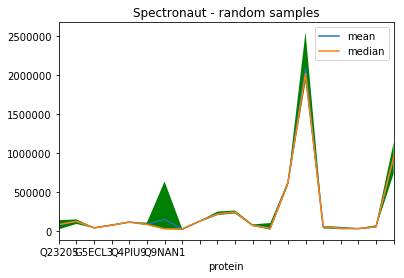

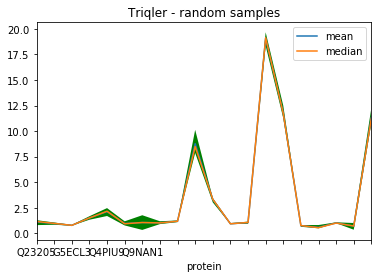

In [19]:
#Triqler is already run with a FRD treshold

#sns ts plot to to visualize diff
ax = sub_sample_s.plot(x="protein", y = ["mean", "median"])
plt.fill_between(x = "protein", y1 = "min", y2 = "max", data = sub_sample_s, facecolor='green')
plt.title("Spectronaut - random samples")

ax = sub_sample_t.plot(x="protein", y = ["mean", "median"])
plt.fill_between(x = "protein", y1 = "min", y2 = "max", data = sub_sample_t, facecolor='green')
plt.title("Triqler - random samples")


Code reads in triqler and spectronaut data. Removed decoy proteins. Compute mean, median, min, max and code plot function for mean and median (as lines) and fill-in with min-max borders. 

The code samples n random overlapping proteins from triqler and spectroanut and plots mean and median with min-max borders. 

Things to check in the code:
- Did i forget to treshold triqler data on q-values?
- What is the unit of triqler protein quantification? (Why is there a magnitude of difference)
- What was the normalization used in previous attempt? (within sample normalization, and why did that make sense?)
- Is there a better way to compare than the previous normalization?
- I guess it is between sample relationship that matter?
- Read up on spike-in proteomics? 


## 2020-12-02



In [47]:
os.chdir("/home/ptruong/git/bayesMS/bin")

In [35]:
import os 

import pandas as pd
import numpy as np 


In [117]:
from read_triqler_output import read_triqler_protein_output_to_df
from triqler_output_df_melter import melt_spectronaut_triqler_formatted, melt_triqler_output

In [3]:
# data dir /home/ptruong/git/bayesMS/data/old_data_pickled

In [118]:
os.chdir("/home/ptruong/git/bayesMS/data/old_data_pickled")

In [6]:
os.listdir()

['triqler.pkl',
 'spectronaut.pkl',
 'triqlerParams.txt',
 'spectronautParams.txt']

In [119]:
spec = pd.read_pickle(r'spectronaut.pkl')
triq = pd.read_pickle(r'triqler.pkl')


Note: To read triqler output data we need to use 

from read_triqler_output import read_triqler_protein_output_to_df

because the peptide seperation is the same as tab-seperation.

In [120]:
os.chdir("/home/ptruong/git/bayesMS/data/triqlerResults_largeScale_minSamp20_FC0_8_adjInt")

In [121]:
os.listdir()

['proteins.6vs8.tsv',
 'proteins.5vs9.tsv',
 'proteins.3vs5.tsv',
 'proteins.4vs10.tsv',
 'proteins.3vs10.tsv',
 'proteins.1vs4.tsv',
 'proteins.5vs6.tsv',
 'proteins.2vs8.tsv',
 'proteins.4vs6.tsv',
 'proteins.2vs6.tsv',
 'proteins.9vs10.tsv',
 'proteins.2vs3.tsv',
 'proteins.7vs8.tsv',
 'proteins.1vs2.tsv',
 'proteins.3vs8.tsv',
 'proteins.3vs6.tsv',
 'proteins.1vs8.tsv',
 'proteins.6vs10.tsv',
 'proteins.5vs10.tsv',
 'proteins.3vs4.tsv',
 'proteins.7vs9.tsv',
 'proteins.1vs7.tsv',
 'proteins.2vs10.tsv',
 'proteins.3vs7.tsv',
 'proteins.8vs9.tsv',
 'proteins.4vs7.tsv',
 'proteins.7vs10.tsv',
 'proteins.2vs7.tsv',
 'proteins.6vs9.tsv',
 'proteins.1vs10.tsv',
 'proteins.4vs9.tsv',
 'proteins.5vs8.tsv',
 'proteins.2vs5.tsv',
 'proteins.1vs9.tsv',
 'proteins.1vs3.tsv',
 'proteins.5vs7.tsv',
 'proteins.1vs6.tsv',
 'proteins.2vs9.tsv',
 'proteins.3vs9.tsv',
 'proteins.6vs7.tsv',
 'proteins.8vs10.tsv',
 'proteins.4vs5.tsv',
 'proteins.4vs8.tsv',
 'proteins.1vs5.tsv',
 'proteins.2vs4.tsv']

In [122]:
triq = read_triqler_protein_output_to_df('proteins.3vs8.tsv')

In [123]:
spec.columns

Index(['id', 'specie', 'protein', 'S01:S01_R01', 'S01:S01_R02', 'S01:S01_R03',
       'S01:S01_R04', 'S01:S01_R05', 'S02:S02_R01', 'S02:S02_R02',
       'S02:S02_R03', 'S02:S02_R04', 'S02:S02_R05', 'S03:S03_R01',
       'S03:S03_R02', 'S03:S03_R03', 'S03:S03_R05', 'S03:S04_R05',
       'S04:S04_R01', 'S04:S04_R02', 'S04:S04_R03', 'S04:S04_R04',
       'S04:S04_R05', 'S05:S05_R01', 'S05:S05_R02', 'S05:S05_R03',
       'S05:S05_R04', 'S05:S05_R05', 'S06:S06_R01', 'S06:S06_R02',
       'S06:S06_R03', 'S06:S06_R04', 'S06:S06_R05', 'S07:S07_R01',
       'S07:S07_R02', 'S07:S07_R03', 'S07:S07_R04', 'S07:S07_R05',
       'S08:S08_R01', 'S08:S08_R02', 'S08:S08_R03', 'S08:S08_R04',
       'S08:S08_R05', 'S09:S09_R01', 'S09:S09_R02', 'S09:S09_R03',
       'S09:S09_R04', 'S09:S09_R05', 'S10:S10_R01', 'S10:S10_R02',
       'S10:S10_R03', 'S10:S10_R04', 'S10:S10_R05'],
      dtype='object')

We notice naming error and rename the column S03:S04_R05 to S03:S03_R05

In [124]:
spec = spec.rename(columns={'S03:S04_R05': 'S03:S03_R04'})

triqler and spectroanut raw data is presented below. Both data set with 0.01 FDR treshold. 


In [8]:
spec

,id,specie,protein,S01:S01_R01,S01:S01_R02,S01:S01_R03,S01:S01_R04,S01:S01_R05,S02:S02_R01,S02:S02_R02,...,S09:S09_R01,S09:S09_R02,S09:S09_R03,S09:S09_R04,S09:S09_R05,S10:S10_R01,S10:S10_R02,S10:S10_R03,S10:S10_R04,S10:S10_R05
0,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,203877.890625,190713.625000,195925.703125,150170.421875,163190.718750,97127.828125,195944.765625,...,NaN,NaN,NaN,NaN,NaN,NaN,767819.750000,NaN,NaN,NaN
1,decoy_A0A023T4K3_CAEEL,CAEEL,decoy_A0A023T4K3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A0A061ACH4_CAEEL,CAEEL,A0A061ACH4,8781.009766,10325.387695,10948.747070,8789.944336,11853.339844,72.113838,3990.177002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A0A061ACL3_CAEEL,CAEEL,A0A061ACL3,298404.781250,296928.375000,309051.406250,325567.562500,277911.718750,144550.265625,142709.437500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A0A061ACR1_CAEEL,CAEEL,A0A061ACR1,336096.625000,354560.000000,378152.875000,359206.312500,387415.562500,187493.328125,200906.875000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15009,V6CLV0_CAEEL,CAEEL,V6CLV0,803615.500000,860085.062500,897633.250000,971245.750000,834293.187500,400180.968750,399113.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15010,V6CM07_CAEEL,CAEEL,V6CM07,18498.939453,21163.210938,19706.724609,28860.738281,16341.950195,13379.542969,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15011,X5JA13_ARATH,ARATH,X5JA13,141788.171875,102453.429688,97403.984375,92313.593750,101041.617188,125743.546875,114827.593750,...,164211.046875,85307.000000,88487.984375,95901.960938,81865.812500,127238.65625,110625.953125,98996.132812,98382.304688,81635.281250
15012,X5JB51_ARATH,ARATH,X5JB51,509657.687500,625327.125000,9751.568359,4141.071289,25130.304688,55028.699219,140951.250000,...,164315.000000,51476.402344,46677.218750,41652.757812,7216.791992,36751.68750,59819.433594,46432.910156,3826.284180,48352.703125


In [9]:
triq

,q_value,posterior_error_prob,num_peptides,protein_id_posterior_error_prob,log2_fold_change,diff_exp_prob_1.0,S01:S01_R01,S01:S01_R02,S01:S01_R03,S01:S01_R04,...,S10:S10_R02,S10:S10_R03,S10:S10_R04,S10:S10_R05,peptides,specie,decoy,id,protein,FDR
0,1.284000e-10,1.284000e-10,465,1.284000e-10,-11.47000,2.924000e-15,0.000238,0.000244,0.000480,0.000195,...,2.4480,2.4250,2.5010,2.4420,VKMPDVDISVPK|FKMPFLSISSPK|FKMPEINIK|ISM[16]SEV...,HUMAN,False,Q09666_HUMAN,Q09666,1.284000e-10
1,1.420000e-10,1.556000e-10,421,1.556000e-10,-10.43000,8.442000e-14,0.000804,0.000450,0.000397,0.000422,...,2.4030,2.2490,2.2650,2.3440,SLQEEHVAVAQLR|EAEQEAARR|KQEELQQLEQQR|TISLVIR|I...,HUMAN,False,Q15149_HUMAN,Q15149,1.420000e-10
2,2.176000e-10,3.686000e-10,311,3.686000e-10,-10.21000,2.266000e-14,0.000641,0.000293,0.000492,0.001091,...,2.4610,2.2850,2.3040,2.2670,EM[16]KPVIFLDVFLPR|LLNFLMK|NLLIFENLIDLKR|YKEVY...,HUMAN,False,P78527-2_HUMAN,P78527-2,2.175333e-10
3,2.622000e-10,3.960000e-10,314,3.936000e-10,-9.47600,2.345000e-12,0.001133,0.000662,0.000671,0.001489,...,2.2670,2.1890,2.1260,2.0830,LKVNFLPEIITLSK|LSLSNAISTALPLTQLR|INMLVIELK|WAI...,HUMAN,False,Q14204_HUMAN,Q14204,2.615500e-10
5,5.753000e-10,1.204000e-09,238,1.183000e-09,-8.84800,2.112000e-11,0.001145,0.002007,0.001241,0.001354,...,2.2320,2.0110,1.9700,2.0390,GRSEADSDKNATILELR|NGVGTSSSMGSGVSDDVFSSSR|NLPLA...,HUMAN,False,P15924_HUMAN,P15924,4.458400e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9425,5.113000e-01,9.990000e-01,3,1.116000e-01,0.21620,9.989000e-01,1.135000,1.156000,1.031000,1.021000,...,1.0090,1.0090,1.0090,1.0090,ESGDQLSVSR|GIGLGLVQQLVK|NAALTVEQSTAELISSFNK,CAEEL,False,P90780_CAEEL,P90780,9.970788e-03
6074,2.684000e-01,9.112000e-01,1,1.118000e-01,0.27480,9.000000e-01,1.920000,2.049000,1.938000,2.441000,...,0.9519,0.9519,0.9519,0.9519,RIGYGIK,CAEEL,False,Q9TVW5_CAEEL,Q9TVW5,9.977931e-03
11844,5.984000e-01,9.999000e-01,3,1.119000e-01,0.02839,9.999000e-01,0.988800,0.981800,0.988800,0.988800,...,1.0370,1.0370,0.8964,1.1400,VACGEGATTEKRPAEAAVEL|DLKIPSEDLSNLVEQCLEK|SFEYC...,HUMAN,True,decoy_O96017_HUMAN,O96017,9.985081e-03
9835,5.295000e-01,9.994000e-01,3,1.121000e-01,-0.06439,9.994000e-01,0.904700,0.831100,0.747000,0.765600,...,1.0830,1.0660,1.0940,1.0090,TGAALLIVPR|VVDTETGISLPR|SQGSQLTEDDVK,ARATH,False,Q9LU36_ARATH,Q9LU36,9.992243e-03


The reported protein expressions per run are the expected value of the protein's expression in that run. They represent relative values (not log transformed) to the protein's mean expression across all runs, which itself would correspond to the value 1.0. For example, a value of 1.5 means that the expression in this sample is 50% higher than the mean across all runs. A second example comparing values across samples: if sample1 has a value of 2.0 and sample2 a value of 1.5, it means that the expression in sample1 is 33% higher than in sample2 (2.0/1.5=1.33). We don't necessarily recommend using these values for downstream analysis, as the idea is that the actual value of interest is the fold change between treatment groups rather than between samples.

The triqler proteins are relative values, so we need to transform spectroanut values to relative values.

We should also treshold the triqler results on protein_id_posterior_error_prob

In [10]:
print(sum(triq.protein_id_posterior_error_prob < 0.01))

11162


In [25]:
print("%s : %i" % ("triqler number of protein ids", int(sum(triq.protein_id_posterior_error_prob < 0.01))))
print("%s : %i" % ("spectronaut number of protein ids", int(len(spec))))

triqler number of protein ids : 11162
spectronaut number of protein ids : 15014


Spectronaut has higher than protein count, but looking at the data above we can see that there are plenty of NaN among samples in the spectronaut. We need to fix this.

We could do this by saying that proteins with more than 2 or 3 NaN in a samples if left out. 

We wrangle triq and spec data to melted df for easier data manipulation. Scripts for this can be found in 

"from triqler_output_df_melter import melt_spectronaut_triqler_formatted, melt_triqler_output"



In [125]:
triq = melt_triqler_output(triq)
spec = melt_spectronaut_triqler_formatted(spec)

In [51]:
spec

,id,specie,protein,sample,run,value
0,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R01,203877.890625
1,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R02,190713.625000
2,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R03,195925.703125
3,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R04,150170.421875
4,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R05,163190.718750
...,...,...,...,...,...,...
750695,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R01,NaN
750696,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R02,NaN
750697,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R03,NaN
750698,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R04,NaN


In [52]:
spec

,id,specie,protein,sample,run,value
0,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R01,203877.890625
1,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R02,190713.625000
2,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R03,195925.703125
3,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R04,150170.421875
4,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R05,163190.718750
...,...,...,...,...,...,...
750695,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R01,NaN
750696,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R02,NaN
750697,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R03,NaN
750698,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R04,NaN


Now, we can work with the melted dataframes.


### Summary :
- made script for reading in triqler output.
- melting script implemented.
- run jobs on kebnekaise with posterior distributions output and default parameters.
- run jobs on kebnekaise with posterior distributions output and min_samples = 10.
- run jobs on kebnekaise with posterior distributions output and min_samples = 1 (Failed: min_samples must be >= 2).

### To do:
- check posterior distribution output format.
- figure out how posterior distribution heatmap plotting works in triqler.
- think about normalization for melted dataframes spec and triq.



## 2020-12-03


Job run on kebnekaise failed because due to exceeding storage. I did wrong in using the storage project. I've contacted the SNIC service to ask for guidance in this. 

Day has been spent writing on Project description.



# Raw data


In [55]:
os.chdir("/home/ptruong/git/bayesMS/data")

In [56]:
os.listdir()

['triqlerResults_largeScale_minSamp20_FC0_8_adjInt',
 'triqler_default_params',
 'PSSS3_raw_sample_top_100000.csv',
 'Headers.xlsx',
 'old_data_pickled']

In [60]:
df = pd.read_csv("PSSS3_raw_sample_top_100000.csv", sep = "\t")

In [61]:
df


,Unnamed: 0,R.Condition,R.FileName,PG.Organisms,PG.ProteinAccessions,PG.Cscore,PG.NrOfStrippedSequencesIdentified,PG.Qvalue,PG.Quantity,EG.StrippedSequence,EG.IsDecoy,EG.PrecursorId,EG.PEP,EG.Qvalue,EG.Cscore,FG.NormalizedMS2PeakArea
0,0,S500-PSSS3-S04,G_D180330_S500-PSSS3-S04_MHRM_R03_T0,Caenorhabditis elegans OX=6239,A0A023T4K3,0.182511,2,0.000646,377452.156250,SFYYLVQDLK,False,_SFYYLVQDLK_.2,0.014793,0.003878,2.355977,731908.023851
1,1,S500-PSSS3-S04,G_D180330_S500-PSSS3-S04_MHRM_R03_T0,Caenorhabditis elegans OX=6239,A0A023T4K3,0.182511,2,0.000646,377452.156250,EATVSESVLSELKR,False,_EATVSESVLSELKR_.3,0.022104,0.005114,2.073540,22996.253835
2,2,S500-PSSS3-S04,G_D180330_S500-PSSS3-S04_MHRM_R03_T0,Caenorhabditis elegans OX=6239,A0A023T4K3,0.182511,2,0.000646,377452.156250,EATVSESVLSELKR,False,_EATVSESVLSELKR_.2,1.000000,0.762912,-2.174942,42741.205204
3,3,S500-PSSS3-S04,G_D180330_S500-PSSS3-S04_MHRM_R03_T0,Caenorhabditis elegans OX=6239,A0A023T4K3,0.182511,2,0.000646,377452.156250,AADFYVR,False,_AADFYVR_.2,0.009466,0.015673,1.283862,36317.379819
4,4,S500-PSSS3-S04,G_D180330_S500-PSSS3-S04_MHRM_R03_T0,Caenorhabditis elegans OX=6239,A0A023T4K3,0.182511,2,0.000646,377452.156250,IGALADVNNSKDPDGLR,False,_IGALADVNNSKDPDGLR_.3,0.422581,0.102376,0.036027,22531.007700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,S500-PSSS3-S04,G_D180330_S500-PSSS3-S04_MHRM_R03_T0,Arabidopsis thaliana,O23044,0.304250,7,0.000407,48658.785156,GLFQSDSALTTNPTTLSNINR,False,_GLFQSDSALTTNPTTLSNINR_.2,0.377402,0.064631,-0.746827,9815.095549
99996,99996,S500-PSSS3-S04,G_D180330_S500-PSSS3-S04_MHRM_R03_T0,Arabidopsis thaliana,O23044,0.304250,7,0.000407,48658.785156,KTFDLSYYQLVLK,False,_KTFDLSYYQLVLK_.2,0.862989,0.246905,-1.849602,70103.139684
99997,99997,S500-PSSS3-S04,G_D180330_S500-PSSS3-S04_MHRM_R03_T0,Arabidopsis thaliana,O23044,NaN,11,NaN,NaN,TGAVGVSR,True,_TGAVGVSR_.2,NaN,NaN,-2.336857,4658.170465
99998,99998,S500-PSSS3-S04,G_D180330_S500-PSSS3-S04_MHRM_R03_T0,Arabidopsis thaliana,O23044,NaN,11,NaN,NaN,ALTNPDTVR,True,_ALTNPDTVR_.2,NaN,NaN,-1.404710,8258.498615


## 2020-12-07 Exploring posteriors data

In [4]:
import os

os.chdir("/home/ptruong/git/bayesMS/data/triqler_default_params_posterios")

In [5]:
os.listdir()

['proteins.6vs8.tsv',
 'proteins.5vs9.tsv',
 'proteins.3vs5.tsv',
 'proteins.4vs10.tsv',
 'proteins.3vs10.tsv',
 'proteins.1vs4.tsv',
 'proteins.5vs6.tsv',
 'proteins.2vs8.tsv',
 'proteins.4vs6.tsv',
 'proteins.2vs6.tsv',
 'proteins.9vs10.tsv',
 'proteins.2vs3.tsv',
 'proteins.7vs8.tsv',
 'proteins.1vs2.tsv',
 'proteins.3vs8.tsv',
 'proteins.3vs6.tsv',
 'proteins.1vs8.tsv',
 'proteins.6vs10.tsv',
 'proteins.5vs10.tsv',
 'proteins.3vs4.tsv',
 'proteins.7vs9.tsv',
 'proteins.1vs7.tsv',
 'F_OUT',
 'proteins.2vs10.tsv',
 'proteins.3vs7.tsv',
 'proteins.8vs9.tsv',
 'proteins.4vs7.tsv',
 'proteins.7vs10.tsv',
 'proteins.2vs7.tsv',
 'proteins.6vs9.tsv',
 'proteins.1vs10.tsv',
 'proteins.4vs9.tsv',
 'proteins.5vs8.tsv',
 'proteins.2vs5.tsv',
 'G_OUT',
 'proteins.1vs9.tsv',
 'proteins.1vs3.tsv',
 'proteins.5vs7.tsv',
 'proteins.1vs6.tsv',
 'proteins.2vs9.tsv',
 'proteins.3vs9.tsv',
 'proteins.6vs7.tsv',
 'proteins.8vs10.tsv',
 'proteins.4vs5.tsv',
 'P_OUT',
 'proteins.4vs8.tsv',
 'proteins.1vs5

In [6]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("P_OUT", sep = "\t")

In [10]:
df

,protein,group:run,-5,-4.99,-4.98,-4.97,-4.96,-4.95,-4.94,-4.93,...,4.91,4.92,4.93,4.94,4.95,4.96,4.97,4.98,4.99,5
0,A0A023T4K3_CAEEL,S01:S01_R01,7.645000e-40,8.081000e-40,8.542000e-40,9.029000e-40,9.544000e-40,1.009000e-39,1.066000e-39,1.127000e-39,...,2.770000e-36,2.482000e-36,2.225000e-36,1.995000e-36,1.789000e-36,1.605000e-36,1.440000e-36,1.292000e-36,1.160000e-36,1.042000e-36
1,A0A023T4K3_CAEEL,S01:S01_R02,3.036000e-40,3.209000e-40,3.392000e-40,3.586000e-40,3.790000e-40,4.006000e-40,4.235000e-40,4.476000e-40,...,7.363000e-37,6.611000e-37,5.938000e-37,5.335000e-37,4.793000e-37,4.308000e-37,3.872000e-37,3.481000e-37,3.130000e-37,2.815000e-37
2,A0A023T4K3_CAEEL,S01:S01_R03,7.332000e-40,7.750000e-40,8.192000e-40,8.659000e-40,9.153000e-40,9.675000e-40,1.023000e-39,1.081000e-39,...,2.311000e-36,2.060000e-36,1.836000e-36,1.638000e-36,1.461000e-36,1.304000e-36,1.164000e-36,1.040000e-36,9.296000e-37,8.310000e-37
3,A0A023T4K3_CAEEL,S01:S01_R04,9.449000e-44,9.988000e-44,1.056000e-43,1.116000e-43,1.180000e-43,1.247000e-43,1.318000e-43,1.393000e-43,...,2.771000e-40,2.479000e-40,2.219000e-40,1.987000e-40,1.779000e-40,1.594000e-40,1.428000e-40,1.280000e-40,1.148000e-40,1.030000e-40
4,A0A023T4K3_CAEEL,S01:S01_R05,1.423000e-35,1.504000e-35,1.590000e-35,1.681000e-35,1.777000e-35,1.878000e-35,1.985000e-35,2.098000e-35,...,9.235000e-34,8.348000e-34,7.547000e-34,6.825000e-34,6.172000e-34,5.582000e-34,5.050000e-34,4.569000e-34,4.135000e-34,3.742000e-34
5,A0A023T4K3_CAEEL,S02:S02_R01,1.345000e-30,1.421000e-30,1.502000e-30,1.588000e-30,1.679000e-30,1.774000e-30,1.876000e-30,1.982000e-30,...,2.041000e-28,1.842000e-28,1.664000e-28,1.502000e-28,1.357000e-28,1.225000e-28,1.106000e-28,9.995000e-29,9.028000e-29,8.156000e-29
6,A0A023T4K3_CAEEL,S02:S02_R02,5.609000e-34,5.929000e-34,6.267000e-34,6.624000e-34,7.002000e-34,7.401000e-34,7.823000e-34,8.269000e-34,...,9.408000e-32,8.481000e-32,7.647000e-32,6.896000e-32,6.219000e-32,5.609000e-32,5.060000e-32,4.565000e-32,4.119000e-32,3.717000e-32
7,A0A023T4K3_CAEEL,S02:S02_R03,5.444000e-35,5.755000e-35,6.083000e-35,6.430000e-35,6.796000e-35,7.184000e-35,7.594000e-35,8.026000e-35,...,6.297000e-33,5.672000e-33,5.111000e-33,4.606000e-33,4.152000e-33,3.743000e-33,3.375000e-33,3.044000e-33,2.746000e-33,2.477000e-33
8,A0A023T4K3_CAEEL,S02:S02_R04,2.411000e-35,2.548000e-35,2.693000e-35,2.847000e-35,3.009000e-35,3.181000e-35,3.362000e-35,3.554000e-35,...,2.225000e-34,2.037000e-34,1.866000e-34,1.711000e-34,1.569000e-34,1.441000e-34,1.323000e-34,1.216000e-34,1.118000e-34,1.029000e-34
9,A0A023T4K3_CAEEL,S02:S02_R05,1.096000e-29,1.158000e-29,1.224000e-29,1.294000e-29,1.368000e-29,1.446000e-29,1.528000e-29,1.615000e-29,...,5.117000e-29,4.766000e-29,4.441000e-29,4.141000e-29,3.862000e-29,3.604000e-29,3.365000e-29,3.143000e-29,2.937000e-29,2.746000e-29


Trying to run the code /home/ptruong/git/triqler/triqler/distribution/python plot_posteriors.py. The following relative imports:

from ..triqler import __version__, __copyright__
from .. import parsers
from .. import hyperparameters
from .. import pgm
from .. import diff_exp


Gives this error


Traceback (most recent call last):

  File "plot_posteriors.py", line 18, in <module>
    
    from ..triqler import __version__, __copyright__
    
ValueError: attempted relative import beyond top-level package
    

How does this relative import work?

    
    
    
 

Plotting worked with:

python -m triqler.distribution.plot_posteriors --protein_id_list protein_list.csv  P_OUT



OUTPUT:



Triqler.distribution.plot_posteriors version 0.6.0
Copyright (c) 2018-2020 Matthew The. All rights reserved.
Written by Matthew The (matthew.the@scilifelab.se) in the
School of Engineering Sciences in Chemistry, Biotechnology and Health at the 
Royal Institute of Technology in Stockholm.
Issued command: plot_posteriors.py --protein_id_list protein_list.csv P_OUT
Protein list posterior plotting not yet supported for protein posteriors


The input F_OUT and G_OUT seem to give the similar response. I need to check if the heatmap plot needs to be run manually.

## 2020-12-08 

In the [triqler manual](https://www.biorxiv.org/content/10.1101/2020.09.24.311605v1.full.pdf). It is specified we should work with original input file (example case: iPRG2016 and we need the peptide quantification file iPRG2016.tsv.pqr.tsv).

In the example case. The following works:

python -m triqler iPRG2016.tsv 

To generate the .tsv.pqr.tsv file. Then we do the protein_id plot.

python -m triqler.distribution.plot_posteriors --protein_id HPRR3730445_poolB iPRG2016.tsv



OUTPUT log:

In [ ]:
(py36) ptruong@planck:~/git/triqler/example$ python -m triqler.distribution.plot_posteriors --protein_id HPRR3730445_poolB iPRG2016.tsv 
Triqler.distribution.plot_posteriors version 0.6.0
Copyright (c) 2018-2020 Matthew The. All rights reserved.
Written by Matthew The (matthew.the@scilifelab.se) in the
School of Engineering Sciences in Chemistry, Biotechnology and Health at the 
Royal Institute of Technology in Stockholm.
Issued command: plot_posteriors.py --protein_id HPRR3730445_poolB iPRG2016.tsv
Could not locate peptide quantification file iPRG2016.tsv.pqr.tsv. Run triqler to generate this file.
(py36) ptruong@planck:~/git/triqler/example$ python -m triqler iPRG2016.tsv 
Triqler version 0.6.0
Copyright (c) 2018-2020 Matthew The. All rights reserved.
Written by Matthew The (matthew.the@scilifelab.se) in the
School of Engineering Sciences in Chemistry, Biotechnology and Health at the 
Royal Institute of Technology in Stockholm.
Issued command: triqler.py iPRG2016.tsv
Parsing triqler input file
  Reading row 0
Calculating identification PEPs
  Identified 12113 PSMs at 1% FDR
Selecting best feature per run and spectrum
  featureGroupIdx: 0
Dividing intensities by 100000 for increased readability
Calculating peptide-level identification PEPs
  Identified 1988 peptides at 1% FDR
Writing peptide quant rows to file: iPRG2016.tsv.pqr.tsv
Calculating protein-level identification PEPs
  Identified 349 proteins at 1% FDR
Fitting hyperparameters
  params["muDetect"], params["sigmaDetect"] = 1.056334, 0.372395
  params["muXIC"], params["sigmaXIC"] = 3.276315, 0.953023
  params["muProtein"], params["sigmaProtein"] = 0.066437, 0.239524
  params["muFeatureDiff"], params["sigmaFeatureDiff"] = -0.013907, 0.149265
  params["shapeInGroupStdevs"], params["scaleInGroupStdevs"] = 1.027176, 0.089433
Calculating protein posteriors
  50 / 422 11.85%
  100 / 422 23.70%
  150 / 422 35.55%
  200 / 422 47.39%
  250 / 422 59.24%
  300 / 422 71.09%
  350 / 422 82.94%
  400 / 422 94.79%
Comparing 1:A+B to 2:B
  output file: proteins.1vs2.tsv
  Found 204 target proteins as differentially abundant at 5% FDR
Comparing 1:A+B to 3:A
  output file: proteins.1vs3.tsv
  Found 216 target proteins as differentially abundant at 5% FDR
Comparing 2:B to 3:A
  output file: proteins.2vs3.tsv
  Found 352 target proteins as differentially abundant at 5% FDR
Triqler execution took 28.871479630994145 seconds wall clock time


In [ ]:
(py36) ptruong@planck:~/git/triqler/example$ python -m triqler.distribution.plot_posteriors --protein_id HPRR3730445_poolB iPRG2016.tsv 
Triqler.distribution.plot_posteriors version 0.6.0
Copyright (c) 2018-2020 Matthew The. All rights reserved.
Written by Matthew The (matthew.the@scilifelab.se) in the
School of Engineering Sciences in Chemistry, Biotechnology and Health at the 
Royal Institute of Technology in Stockholm.
Issued command: plot_posteriors.py --protein_id HPRR3730445_poolB iPRG2016.tsv
Could not locate peptide quantification file iPRG2016.tsv.pqr.tsv. Run triqler to generate this file.
(py36) ptruong@planck:~/git/triqler/example$ python -m triqler iPRG2016.tsv 
Triqler version 0.6.0
Copyright (c) 2018-2020 Matthew The. All rights reserved.
Written by Matthew The (matthew.the@scilifelab.se) in the
School of Engineering Sciences in Chemistry, Biotechnology and Health at the 
Royal Institute of Technology in Stockholm.
Issued command: triqler.py iPRG2016.tsv
Parsing triqler input file
  Reading row 0
Calculating identification PEPs
  Identified 12113 PSMs at 1% FDR
Selecting best feature per run and spectrum
  featureGroupIdx: 0
Dividing intensities by 100000 for increased readability
Calculating peptide-level identification PEPs
  Identified 1988 peptides at 1% FDR
Writing peptide quant rows to file: iPRG2016.tsv.pqr.tsv
Calculating protein-level identification PEPs
  Identified 349 proteins at 1% FDR
Fitting hyperparameters
  params["muDetect"], params["sigmaDetect"] = 1.056334, 0.372395
  params["muXIC"], params["sigmaXIC"] = 3.276315, 0.953023
  params["muProtein"], params["sigmaProtein"] = 0.066437, 0.239524
  params["muFeatureDiff"], params["sigmaFeatureDiff"] = -0.013907, 0.149265
  params["shapeInGroupStdevs"], params["scaleInGroupStdevs"] = 1.027176, 0.089433
Calculating protein posteriors
  50 / 422 11.85%
  100 / 422 23.70%
  150 / 422 35.55%
  200 / 422 47.39%
  250 / 422 59.24%
  300 / 422 71.09%
  350 / 422 82.94%
  400 / 422 94.79%
Comparing 1:A+B to 2:B
  output file: proteins.1vs2.tsv
  Found 204 target proteins as differentially abundant at 5% FDR
Comparing 1:A+B to 3:A
  output file: proteins.1vs3.tsv
  Found 216 target proteins as differentially abundant at 5% FDR
Comparing 2:B to 3:A
  output file: proteins.2vs3.tsv
  Found 352 target proteins as differentially abundant at 5% FDR
Triqler execution took 28.871479630994145 seconds wall clock time
(py36) ptruong@planck:~/git/triqler/example$ ls
iPRG2016_ref.proteins.1vs2.tsv	iPRG2016_ref.tsv.pqr.tsv  proteins.1vs2.tsv
iPRG2016_ref.proteins.1vs3.tsv	iPRG2016.tsv		  proteins.1vs3.tsv
iPRG2016_ref.proteins.2vs3.tsv	iPRG2016.tsv.pqr.tsv	  proteins.2vs3.tsv
(py36) ptruong@planck:~/git/triqler/example$ python -m triqler.distribution.plot_posteriors --protein_id HPRR3730445_poolB iPRG2016.tsv 
Triqler.distribution.plot_posteriors version 0.6.0
Copyright (c) 2018-2020 Matthew The. All rights reserved.
Written by Matthew The (matthew.the@scilifelab.se) in the
School of Engineering Sciences in Chemistry, Biotechnology and Health at the 
Royal Institute of Technology in Stockholm.
Issued command: plot_posteriors.py --protein_id HPRR3730445_poolB iPRG2016.tsv
Fitting hyperparameters
  params["muDetect"], params["sigmaDetect"] = 1.056315, 0.372438
  params["muXIC"], params["sigmaXIC"] = 3.276315, 0.953023
  params["muProtein"], params["sigmaProtein"] = 0.066425, 0.239521
  params["muFeatureDiff"], params["sigmaFeatureDiff"] = -0.013907, 0.149265
  params["shapeInGroupStdevs"], params["scaleInGroupStdevs"] = 1.027176, 0.089432

Protein ID: HPRR3730445_poolB

Peptide absolute abundances
760.43	509.03	1028.25	842.80	1610.55	1289.44	nan	nan	nan	combinedPEP=3.4e-06	peptide=R.WTAQGHANHGFVVEVAHLEEK.Q
99.93	166.59	3184.98	1868.59	6260.46	5909.35	nan	nan	59.71	combinedPEP=2.2e-05	peptide=R.LVNQNASRWESFDVTPAVMR.W
10064.52	12531.44	nan	27429.83	26226.20	23061.53nan	242.17	19.53	combinedPEP=0.0023	peptide=R.WESFDVTPAVMR.W

Peptide relative abundances
0.81	0.54	1.09	0.90	1.71	1.37	nan	nan	nan	combinedPEP=3.4e-06	peptide=R.WTAQGHANHGFVVEVAHLEEK.Q
0.12	0.21	3.96	2.32	7.78	7.34	nan	nan	0.07	combinedPEP=2.2e-05	peptide=R.LVNQNASRWESFDVTPAVMR.W
2.70	3.37	nan	7.37	7.05	6.20	nan	0.07	0.01	combinedPEP=0.0023	peptide=R.WESFDVTPAVMR.W

Protein abundance (expected value) and p-value
3.27	2.97	5.48	7.66	13.64	11.55	0.01	0.07	0.02
p-value: 3.2822538226303985e-05

Posterior probability |log2 fold change| < 1.00
  Group A+B vs Group B: 0.130072
  Group A+B vs Group A: 0.000000
  Group B vs Group A: 0.000000

Normal distribution fits for posterior distributions of treatment group relative abundances:
  Group A+B: mu, sigma = 0.472918, 0.114328
  Group B: mu, sigma = 0.918317, 0.071100
  Group A: mu, sigma = -1.782820, 0.269253
(py36) ptruong@planck:~/git/triqler/example$ 


Test attempt on PSSS3

and the following set of proteins.

A0A023T4K3_CAEEL

A0A061ACH4_CAEEL

A0A061ACK4_CAEEL

A0A061ACL3_CAEEL

A0A061ACR1_CAEEL

A0A061ACS5_CAEEL

A0A061ACU2_CAEEL

A0A061ACU6_CAEEL

A0A061ACY0_CAEEL

A0A061AD21_CAEEL

A0A061AD39_CAEEL

A0A061AD47_CAEEL

A0A061AE05_CAEEL

A0A061AJ42_CAEEL

A0A061AJK8_CAEEL

A0A061AKY5_CAEEL

A0A061AL58_CAEEL

A0A078BPG0_CAEEL

A0A078BPH9_CAEEL

A0A078BPJ4_CAEEL

There proteins are saved in protein_list.csv

 Command run:
 
 python -m triqler.distribution.plot_posteriors --protein_id_list protein_list.csv PSSS3_triqlerFormatted_nonShared.csv
 
 output plots are in results/2020-12-08

### Working with melted data


In [3]:
import os

In [56]:
os.chdir("/home/ptruong/git/bayesMS/bin")

In [66]:
import os 

import pandas as pd
import numpy as np 

from read_triqler_output import read_triqler_protein_output_to_df
from triqler_output_df_melter import melt_spectronaut_triqler_formatted, melt_triqler_output
from count_melted import count_melted_for_all_samples

os.chdir("/home/ptruong/git/bayesMS/data/old_data_pickled")
os.listdir()

['spectronaut.pkl',
 'spectronautParams.txt',
 'triqlerParams.txt',
 'triqler.pkl']

In [49]:
 pd.set_option('display.max_rows', 10)

In [10]:
spec = pd.read_pickle(r'spectronaut.pkl')
triq = pd.read_pickle(r'triqler.pkl')


In [12]:
os.chdir("/home/ptruong/git/bayesMS/data/triqlerResults_largeScale_minSamp20_FC0_8_adjInt")

In [13]:
os.listdir()

['proteins.6vs8.tsv',
 'proteins.5vs9.tsv',
 'proteins.3vs5.tsv',
 'proteins.4vs10.tsv',
 'proteins.3vs10.tsv',
 'proteins.1vs4.tsv',
 'proteins.5vs6.tsv',
 'proteins.2vs8.tsv',
 'proteins.4vs6.tsv',
 'proteins.2vs6.tsv',
 'proteins.9vs10.tsv',
 'proteins.2vs3.tsv',
 'proteins.7vs8.tsv',
 'proteins.1vs2.tsv',
 'proteins.3vs8.tsv',
 'proteins.3vs6.tsv',
 'proteins.1vs8.tsv',
 'proteins.6vs10.tsv',
 'proteins.5vs10.tsv',
 'proteins.3vs4.tsv',
 'proteins.7vs9.tsv',
 'proteins.1vs7.tsv',
 'proteins.2vs10.tsv',
 'proteins.3vs7.tsv',
 'proteins.8vs9.tsv',
 'proteins.4vs7.tsv',
 'proteins.7vs10.tsv',
 'proteins.2vs7.tsv',
 'proteins.6vs9.tsv',
 'proteins.1vs10.tsv',
 'proteins.4vs9.tsv',
 'proteins.5vs8.tsv',
 'proteins.2vs5.tsv',
 'proteins.1vs9.tsv',
 'proteins.1vs3.tsv',
 'proteins.5vs7.tsv',
 'proteins.1vs6.tsv',
 'proteins.2vs9.tsv',
 'proteins.3vs9.tsv',
 'proteins.6vs7.tsv',
 'proteins.8vs10.tsv',
 'proteins.4vs5.tsv',
 'proteins.4vs8.tsv',
 'proteins.1vs5.tsv',
 'proteins.2vs4.tsv']

In [14]:
triq = read_triqler_protein_output_to_df('proteins.3vs8.tsv')
triq2 = read_triqler_protein_output_to_df('proteins.2vs6.tsv')

In [15]:
spec = spec.rename(columns={'S03:S04_R05': 'S03:S03_R04'})

In [16]:
triq = melt_triqler_output(triq)
spec = melt_spectronaut_triqler_formatted(spec)

In [17]:
triq2=melt_triqler_output(triq2)

In [50]:
triq

,q_value,posterior_error_prob,protein,num_peptides,protein_id_posterior_error_prob,log2_fold_change,diff_exp_prob_0.8,sample,run,value,peptide,species,specie
0,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R01,41.3300,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...,CAEEL,CAEEL
1,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R02,41.0700,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...,CAEEL,CAEEL
2,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R03,38.9800,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...,CAEEL,CAEEL
3,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R04,40.1300,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...,CAEEL,CAEEL
4,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R05,40.5900,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...,CAEEL,CAEEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543045,9.537000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.01544,1.000000e+00,S10,R01,1.0150,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...,ARATH,ARATH
543046,9.537000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.01544,1.000000e+00,S10,R02,1.0360,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...,ARATH,ARATH
543047,9.537000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.01544,1.000000e+00,S10,R03,1.0420,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...,ARATH,ARATH
543048,9.537000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.01544,1.000000e+00,S10,R04,0.9652,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...,ARATH,ARATH


In [51]:
triq2

,q_value,posterior_error_prob,protein,num_peptides,protein_id_posterior_error_prob,log2_fold_change,diff_exp_prob_0.8,sample,run,value,peptide
0,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,4.139000,1.967000e-13,S01,R01,41.3300,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
1,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,4.139000,1.967000e-13,S01,R02,41.0700,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
2,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,4.139000,1.967000e-13,S01,R03,38.9800,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
3,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,4.139000,1.967000e-13,S01,R04,40.1300,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
4,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,4.139000,1.967000e-13,S01,R05,40.5900,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
...,...,...,...,...,...,...,...,...,...,...,...
543045,6.674000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.007193,1.000000e+00,S10,R01,1.0150,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...
543046,6.674000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.007193,1.000000e+00,S10,R02,1.0360,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...
543047,6.674000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.007193,1.000000e+00,S10,R03,1.0420,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...
543048,6.674000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.007193,1.000000e+00,S10,R04,0.9652,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...


In [52]:
spec

,id,specie,protein,sample,run,value
0,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R01,203877.890625
1,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R02,190713.625000
2,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R03,195925.703125
3,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R04,150170.421875
4,A0A023T4K3_CAEEL,CAEEL,A0A023T4K3,S01,R05,163190.718750
...,...,...,...,...,...,...
750695,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R01,NaN
750696,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R02,NaN
750697,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R03,NaN
750698,X5M5N0_CAEEL,CAEEL,X5M5N0,S10,R04,NaN


### Lets work with triq...

In [33]:
samples = ["S0"+str(i) for i in range(1,10)] + ["S10"]

In [34]:
samples

['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10']

In [136]:
triq["specie"] = triq.protein.apply(lambda x: x.split('_')[-1])

In [53]:
triq[triq["sample"] == "S01"]

,q_value,posterior_error_prob,protein,num_peptides,protein_id_posterior_error_prob,log2_fold_change,diff_exp_prob_0.8,sample,run,value,peptide,species,specie
0,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R01,41.3300,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...,CAEEL,CAEEL
1,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R02,41.0700,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...,CAEEL,CAEEL
2,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R03,38.9800,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...,CAEEL,CAEEL
3,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R04,40.1300,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...,CAEEL,CAEEL
4,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R05,40.5900,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...,CAEEL,CAEEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543000,9.537000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.01544,1.000000e+00,S01,R01,1.0040,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...,ARATH,ARATH
543001,9.537000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.01544,1.000000e+00,S01,R02,1.0300,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...,ARATH,ARATH
543002,9.537000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.01544,1.000000e+00,S01,R03,1.0300,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...,ARATH,ARATH
543003,9.537000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.01544,1.000000e+00,S01,R04,1.0330,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...,ARATH,ARATH


In [54]:
# Identified protein through all samples
print("%s : %i" % ("triqler number of protein ids", int(sum(triq.protein_id_posterior_error_prob < 0.01))))
print("%s : %i" % ("spectronaut number of protein ids", int(len(spec.dropna()))))

# Identified protein for species across all samples
triq_count = len(triq[triq.specie == "ARATH"])
spec_count = len(spec[spec.specie == "ARATH"].dropna())

print("%s : %i" % ("triqler ARATH number of protein ids", triq_count))
print("%s : %i" % ("spectronaut ARATH number of protein ids", spec_count))

triq_count = len(triq[triq.specie == "CAEEL"])
spec_count = len(spec[spec.specie == "CAEEL"].dropna())

print("%s : %i" % ("triqler CAEEL number of protein ids", triq_count))
print("%s : %i" % ("spectronaut CAEEL number of protein ids", spec_count))

triq_count = len(triq[triq.specie == "HUMAN"])
spec_count = len(spec[spec.specie == "HUMAN"].dropna())

print("%s : %i" % ("triqler HUMAN number of protein ids", triq_count))
print("%s : %i" % ("spectronaut HUMAN number of protein ids", spec_count))

triqler number of protein ids : 543050
spectronaut number of protein ids : 543601
triqler ARATH number of protein ids : 189800
spectronaut ARATH number of protein ids : 218754
triqler CAEEL number of protein ids : 73600
spectronaut CAEEL number of protein ids : 58732
triqler HUMAN number of protein ids : 279650
spectronaut HUMAN number of protein ids : 266115


In [70]:
samples = ["S0"+str(i) for i in range(1,10)] + ["S10"]


In [71]:
samples

['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10']

In [72]:

count_melted_for_all_samples(triq, specie = None)


[54305, 54305, 54305, 54305, 54305, 54305, 54305, 54305, 54305, 54305]

In [73]:
count_melted_for_all_samples(triq, specie = "HUMAN")


[27965, 27965, 27965, 27965, 27965, 27965, 27965, 27965, 27965, 27965]

In [74]:
count_melted_for_all_samples(triq, specie = "CAEEL")


[7360, 7360, 7360, 7360, 7360, 7360, 7360, 7360, 7360, 7360]

In [75]:
count_melted_for_all_samples(triq, specie = "ARATH")


[18980, 18980, 18980, 18980, 18980, 18980, 18980, 18980, 18980, 18980]

In [76]:
count_melted_for_all_samples(spec, specie = None)


[43530, 66501, 61173, 57595, 54205, 52857, 52299, 51731, 52031, 51679]

In [77]:
count_melted_for_all_samples(spec, specie = "HUMAN")


[150, 26634, 29423, 29849, 29887, 29977, 30086, 29976, 30193, 29940]

In [78]:
count_melted_for_all_samples(spec, specie = "CAEEL")


[20808, 17464, 9863, 5896, 2566, 1155, 490, 229, 137, 124]

In [79]:
count_melted_for_all_samples(spec, specie = "ARATH")


[22572, 22403, 21887, 21850, 21752, 21725, 21723, 21526, 21701, 21615]

In the above counting we are counting the number identified proteins, without imputation for spec for each sample (i.e. with all 5 runs for each sample, triq is tresholded at 1%PEP and spec is tresholded at 1%FRD).

## 2020-12-09

### Fold change matrix

We can compute a couple of fold change matrices for exploration.

1. triqler posterior distribution differential expression for each proteinXvsY file.
2. triqler fold change differential expression.
3. spectronaut fold change differential expression.

How about the imputations? 
- I want to skip imputation for as long as possible.


### Triqler input should have 1 intensities set to NaN

Coded up this part in bin/script_convert_PSSS3_1toNaN.py

### Normalization

Normalization withing sample and run is performed. The logic is that all proteins from each sample and run should sum to 100%, but I do not know if this is correct after FDR tresholding. 

In [91]:
os.chdir("/home/ptruong/git/bayesMS/bin")

In [99]:
from normalize_melted import normalize_within_sample

In [103]:
from normalize_melted import get_ratios_from_normalized_melted_df #Why no work??


ImportError: cannot import name 'get_ratios_from_normalized_melted_df'

In [104]:
def get_ratios_from_normalized_melted_df(df, specie):
    """
    input - normalized df (triq, spec)
    output - ratios dataframe
    """
    samples = ["S0"+str(i) for i in range(1,10)] + ["S10"] 
    runs = ["R0" + str(i) for i in range(1,6)]
    
    ratios = []
    for sample in samples:
        ratios_for_sample = []
        for run in runs:
            df_sample = df[df["sample"] == sample]
            df_sample_run = df_sample[df_sample["run"] == run]
            df_sample_run_spec = df_sample_run[df_sample_run["specie"] == specie]
            ratios_for_sample.append(df_sample_run_spec.value.sum())
        ratios.append(ratios_for_sample)
    ratios_df = pd.DataFrame(ratios, index = samples, columns = runs)
    return ratios_df


In [84]:
df_spec = normalize_within_sample(spec)
df_triq  = normalize_within_sample(triq)


/home/ptruong/.local/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### Mixture ratios

Below is a presentation of the mixture ratios of the different species. 

### True ratios as a reminder

| Species     | S01 | S02  | S03   | S04    | S05   | S06    | S07   | S08   | S09   | S10 |
|-------------|-----|------|-------|--------|-------|--------|-------|-------|-------|-----|
| A. thaliana | 0.5 | 0.5  | 0.5   | 0.5    | 0.5   | 0.5    | 0.5   | 0.5   | 0.5   | 0.5 |
| C. elegans  | 0.5 | 0.25 | 0.125 | 0.0625 | 0.031 | 0.0155 | 0.008 | 0.004 | 0.002 | 0   |
| H. sapiens  | 0   | 0.25 | 0.375 | 0.4375 | 0.469 | 0.4845 | 0.492 | 0.496 | 0.498 | 0.5 |

<center><strong>Table 1</strong> . Protein ratios of the ten samples {S01, S02, ..., S10}.</center>

### Triqler normalized within sample ratios

In [105]:
get_ratios_from_normalized_melted_df(df_triq, "HUMAN")


,R01,R02,R03,R04,R05
S01,0.128203,0.126626,0.120877,0.127743,0.116869
S02,0.289482,0.291946,0.290659,0.287219,0.290460
S03,0.491754,0.487170,0.486278,0.483526,0.484137
S04,0.560859,0.560926,0.560348,0.558908,0.562115
S05,0.601416,0.598230,0.592589,0.593048,0.590547
S06,0.612168,0.626370,0.606038,0.604525,0.601781
S07,0.623440,0.639131,0.609387,0.615723,0.612576
S08,0.615171,0.708059,0.620531,0.620357,0.613928
S09,0.625644,0.620596,0.613507,0.624937,0.613674
S10,0.610641,0.606414,0.606816,0.605386,0.603594


In [106]:
get_ratios_from_normalized_melted_df(df_triq, "ARATH")


,R01,R02,R03,R04,R05
S01,0.202221,0.207353,0.206096,0.203861,0.210821
S02,0.263496,0.264762,0.266483,0.266022,0.270651
S03,0.273122,0.276097,0.279398,0.281625,0.281548
S04,0.282105,0.285016,0.288407,0.286770,0.290583
S05,0.290369,0.291970,0.297159,0.295287,0.298664
S06,0.284978,0.278644,0.289323,0.288021,0.292126
S07,0.285500,0.269952,0.284272,0.283905,0.285864
S08,0.277279,0.225521,0.279139,0.277611,0.278581
S09,0.276741,0.279461,0.281202,0.284556,0.282891
S10,0.286438,0.283075,0.288762,0.289589,0.289557


In [107]:
get_ratios_from_normalized_melted_df(df_triq, "CAEEL")


,R01,R02,R03,R04,R05
S01,0.669577,0.666021,0.673027,0.668396,0.672311
S02,0.447023,0.443292,0.442858,0.446759,0.438889
S03,0.235124,0.236733,0.234325,0.234849,0.234315
S04,0.157036,0.154057,0.151245,0.154322,0.147303
S05,0.108215,0.109800,0.110252,0.111665,0.110790
S06,0.102855,0.094986,0.104640,0.107454,0.106093
S07,0.091061,0.090917,0.106341,0.100372,0.101560
S08,0.107549,0.066420,0.100330,0.102032,0.107491
S09,0.097615,0.099942,0.105291,0.090508,0.103435
S10,0.102920,0.110511,0.104422,0.105024,0.106849


### Spectronaut normalized within sample ratios

In [109]:
get_ratios_from_normalized_melted_df(df_spec, "HUMAN")


,R01,R02,R03,R04,R05
S01,0.000142,0.006533,0.000000,0.000340,0.000000
S02,0.219433,0.230812,0.215881,0.270386,0.268880
S03,0.353454,0.346912,0.338908,0.342514,0.342131
S04,0.378023,0.380670,0.387151,0.385364,0.387890
S05,0.399998,0.406819,0.393940,0.398728,0.396520
S06,0.426578,0.427706,0.410134,0.415170,0.414603
S07,0.440774,0.442464,0.420743,0.419045,0.454594
S08,0.423673,0.532117,0.432001,0.439144,0.429417
S09,0.443085,0.430571,0.427718,0.431624,0.425632
S10,0.412168,0.416974,0.411104,0.419243,0.414248


In [110]:
get_ratios_from_normalized_melted_df(df_spec, "ARATH")


,R01,R02,R03,R04,R05
S01,0.718387,0.709902,0.717234,0.719183,0.715033
S02,0.650569,0.635745,0.650215,0.609311,0.605776
S03,0.596266,0.592043,0.597642,0.595323,0.602168
S04,0.591857,0.587589,0.584385,0.578559,0.581851
S05,0.588080,0.580873,0.591711,0.586733,0.585161
S06,0.565183,0.564956,0.583932,0.576295,0.577756
S07,0.555158,0.552160,0.578245,0.573948,0.542448
S08,0.575006,0.466419,0.565983,0.558071,0.568368
S09,0.553483,0.568904,0.569775,0.568369,0.573979
S10,0.587524,0.579042,0.587372,0.580757,0.583747


In [111]:
get_ratios_from_normalized_melted_df(df_spec, "CAEEL")

,R01,R02,R03,R04,R05
S01,0.281471,0.283565,0.282766,0.280477,0.284967
S02,0.129998,0.133443,0.133904,0.120304,0.125345
S03,0.050280,0.061045,0.063450,0.062163,0.055701
S04,0.030119,0.031741,0.028464,0.036078,0.030258
S05,0.011922,0.012308,0.014349,0.014539,0.018319
S06,0.008239,0.007338,0.005934,0.008535,0.007641
S07,0.004068,0.005375,0.001012,0.007007,0.002958
S08,0.001320,0.001464,0.002016,0.002785,0.002215
S09,0.003432,0.000525,0.002507,0.000007,0.000389
S10,0.000308,0.003984,0.001524,0.000000,0.002005


In [126]:
from constants import get_sample_ratios, get_log2FC_ratio_matrix, get_log2FC_ratio_matrices



In [127]:

ARATH_FC_matrix, CAEEL_FC_matrix, HUMAN_FC_matrix = get_log2FC_ratio_matrices()

In [114]:
ARATH_FC_matrix

,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10
S01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
CAEEL_FC_matrix

,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10
S01,0.000000,1.000000,2.000000,3.000000,4.011588,5.011588,5.965784,6.965784,7.965784,18.931569
S02,-1.000000,0.000000,1.000000,2.000000,3.011588,4.011588,4.965784,5.965784,6.965784,17.931569
S03,-2.000000,-1.000000,0.000000,1.000000,2.011588,3.011588,3.965784,4.965784,5.965784,16.931569
S04,-3.000000,-2.000000,-1.000000,0.000000,1.011588,2.011588,2.965784,3.965784,4.965784,15.931569
S05,-4.011588,-3.011588,-2.011588,-1.011588,0.000000,1.000000,1.954196,2.954196,3.954196,14.919981
S06,-5.011588,-4.011588,-3.011588,-2.011588,-1.000000,0.000000,0.954196,1.954196,2.954196,13.919981
S07,-5.965784,-4.965784,-3.965784,-2.965784,-1.954196,-0.954196,0.000000,1.000000,2.000000,12.965784
S08,-6.965784,-5.965784,-4.965784,-3.965784,-2.954196,-1.954196,-1.000000,0.000000,1.000000,11.965784
S09,-7.965784,-6.965784,-5.965784,-4.965784,-3.954196,-2.954196,-2.000000,-1.000000,0.000000,10.965784
S10,-18.931569,-17.931569,-16.931569,-15.931569,-14.919981,-13.919981,-12.965784,-11.965784,-10.965784,0.000000


In [130]:
HUMAN_FC_matrix

,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10
S01,0.000000,-17.931569,-18.516531,-18.738923,-18.839228,-18.886137,-18.908299,-18.919981,-18.925786,-18.931569
S02,17.931569,0.000000,-0.584963,-0.807355,-0.907660,-0.954569,-0.976730,-0.988412,-0.994218,-1.000000
S03,18.516531,0.584963,0.000000,-0.222392,-0.322697,-0.369606,-0.391768,-0.403450,-0.409255,-0.415037
S04,18.738923,0.807355,0.222392,0.000000,-0.100305,-0.147214,-0.169375,-0.181057,-0.186863,-0.192645
S05,18.839228,0.907660,0.322697,0.100305,0.000000,-0.046909,-0.069070,-0.080752,-0.086558,-0.092340
S06,18.886137,0.954569,0.369606,0.147214,0.046909,0.000000,-0.022162,-0.033843,-0.039649,-0.045431
S07,18.908299,0.976730,0.391768,0.169375,0.069070,0.022162,0.000000,-0.011682,-0.017487,-0.023270
S08,18.919981,0.988412,0.403450,0.181057,0.080752,0.033843,0.011682,0.000000,-0.005806,-0.011588
S09,18.925786,0.994218,0.409255,0.186863,0.086558,0.039649,0.017487,0.005806,0.000000,-0.005782
S10,18.931569,1.000000,0.415037,0.192645,0.092340,0.045431,0.023270,0.011588,0.005782,0.000000


### Thoughs on how to compute the fold change differential expression

For FC diff expression could we take the FC_matrix x ratio of the FC to get a treshold for what is considered FC differentially expressed?.

This fold change could for example be 0.8 of the true FC. Where we choose the ratio such that it allows for a small margin, write it as a formula so that we can change this treshold...



## 2020-12-10
### Continuing my work on differential expression

Just coded up from scripts for extracting protein abundances and proteins list from melted dataframes.

In [132]:
os.chdir("/home/ptruong/git/bayesMS/bin")
from extract_from_melt import get_protein_abundance, get_proteins


In [135]:
triq

,q_value,posterior_error_prob,protein,num_peptides,protein_id_posterior_error_prob,log2_fold_change,diff_exp_prob_0.8,sample,run,value,peptide
0,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R01,41.3300,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
1,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R02,41.0700,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
2,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R03,38.9800,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
3,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R04,40.1300,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
4,1.168000e-09,1.168000e-09,P02566_CAEEL,152,1.167000e-09,5.84600,9.828000e-14,S01,R05,40.5900,ELLLDLPIK;YKQLTHQLEDAEER;HPNFEKPKPPK;DLEEANM[1...
...,...,...,...,...,...,...,...,...,...,...,...
543045,9.537000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.01544,1.000000e+00,S10,R01,1.0150,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...
543046,9.537000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.01544,1.000000e+00,S10,R02,1.0360,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...
543047,9.537000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.01544,1.000000e+00,S10,R03,1.0420,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...
543048,9.537000e-01,1.000000e+00,Q0WLB5_ARATH,66,1.214000e-08,-0.01544,1.000000e+00,S10,R04,0.9652,DLLLVNLR;VAAYIYK;NFLM[16]EAK;EATSFLLDVLKPNLPEH...


In [137]:
proteins = get_proteins(spec, "HUMAN") #FUNC TEST
proteins = get_proteins(triq, "HUMAN") #FUNC TEST

In [138]:
samples = ["S0"+str(i) for i in range(1,10)] + ["S10"] 
species = ["ARATH", "CAEEL", "HUMAN"]

df = df_triq #variable
df = df_spec #variable

sample = samples[0] #Variable
specie = "HUMAN" #variable
protein = "Q8TBA6_HUMAN" #VAR

protein = proteins[0] #iteration variable (if the protein is diff exp)
    
    

In [139]:
get_protein_abundance(triq, "S01", "HUMAN", protein) #FUNC TEST


18550    0.7940
18551    1.3410
18552    0.4786
18553    1.6060
18554    0.1356
Name: value, dtype: float64

I want to compute a pairwise log2FC between samples for each protein and run. i.e. a dataframe similar to 

| Protein | Run1 | Run2 | Run3 | Run4 | Run5 |
|---------|------|------|------|------|------|
| P1      | .    |      |      |      |      |
| P2      |      | .    |      |      |      |
| ...     |      |      | .    |      |      |
| Pn      |      |      |      | .    | ...  |

will be generated for each pair SX vs XY. Then we can treshold this table and count the logFC differential expression. Either by 

1) Treshold by FC and setting if >3 proteins are differntially expressed than it is a differentially expressed protein or
2) Count the total number of differentially expressed proteins (which should be better for triqler, since we cannot compare with NaN).

However, the code to produce this dataframe (below) is very slow. It takes about 15min for each pairwise matrix to be construction. For 45 comparisons it will take 675min (i.e) 11 hours. I will try to parallize the computation to save some time.

In [142]:
import time
start = time.time()

sample1 = "S02" #Var
sample2 = "S06" #Var
specie = "HUMAN" #Var
protein = proteins[0] #Var

log2FC_array = []
for protein in proteins:
    abundance_sample1 = get_protein_abundance(df, sample1, specie, protein)
    abundance_sample2 = get_protein_abundance(df, sample2, specie, protein)
    log2FC = np.log2(abundance_sample2) - np.log2(abundance_sample1)
    log2FC_array.append(log2FC)
    #break # ADDED JUST IN CASE WE RUN CELL - IT TAKES 15min on Planck.
end = time.time()
print(end-start)


755.7753973007202


The library joblib has a simple process for performing embarrasingly parallell jobs.

In [144]:
# Example script

# Sequential
from math import sqrt
test= []
for i in range(10):
    test.append(sqrt(i**2))

# Parallell
from math import sqrt
from joblib import Parallel, delayed
Parallel(n_jobs=2)(delayed(sqrt)(i ** 2) for i in range(10))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [153]:

def parallel_get_protein(df, protein, sample1, sample2, specie):
    abundance_sample1 = get_protein_abundance(df, sample1, specie, protein)
    abundance_sample2 = get_protein_abundance(df, sample2, specie, protein)
    log2FC = np.log2(abundance_sample2.values) - np.log2(abundance_sample1.values)
    return log2FC

import multiprocessing
num_cores = multiprocessing.cpu_count()

sample1 = "S02" #VAR
sample2 = "S06" #VAR
specie = "HUMAN" #VAR
df = triq #VAR




In [154]:
parallel_get_protein(df, protein, sample1, sample2, specie)

array([1.25103933, 1.14043778, 1.16028107, 1.14924195, 1.21299372])

In [155]:
start=time.time()
log2FC_array = Parallel(n_jobs=num_cores)(delayed(parallel_get_protein)(df, protein, sample1, sample2, specie) for protein in proteins)
end=time.time()
print(time.time())


exception calling callback for <Future at 0x7f420ded0f60 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/home/ptruong/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/home/ptruong/anaconda3/lib/python3.6/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
ModuleNotFoundError: No module named 'extract_from_melt'
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/ptruong/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/home/ptruong/anaconda3/lib/python3.6/site-packages/joblib/parallel.py", line 366, in __call__
    self.parallel.dispatch_next()
  File "/home/ptruong/anaconda3/lib/

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

This always happens when using multiprocessing in an iPython console in Spyder. A workaround is to run the script from the command line instead. 

(https://stackoverflow.com/questions/56154654/a-task-failed-to-un-serialize)

Write about the wierd parallel processing timing...


In [162]:

from math import sqrt
test= []
for i in range(10):
    test.append(sqrt(i**2))

from math import sqrt
from joblib import Parallel, delayed
test2 = Parallel(n_jobs=2)(delayed(sqrt)(i ** 2) for i in range(10))

g = "g"
def get_val(x,g):
    return str(x)+str("_tetst")+str(g)



In [163]:

# write about this timing thingy here... wierd...
start=time.time()
test3 = Parallel(n_jobs=1)(delayed(get_val)(i,g) for i in ["a","b","c","d","e","b","c","d","e","b","c","d","e"])
end=time.time()
print(end-start)


0.0007114410400390625


In [164]:

# write about this timing thingy here... wierd...
start=time.time()
test3 = Parallel(n_jobs=8)(delayed(get_val)(i,g) for i in ["a","b","c","d","e","b","c","d","e","b","c","d","e"])
end=time.time()
print(end-start)


0.2426769733428955


I wonder why it is so much slower (joblid)... the computations for log2FC is also much slower, it never finished before 15min... so I just ran some samples while in gym. 

In [159]:

def get_log2FC_matrix(df, sample1, sample2, specie):
    proteins = get_proteins(df, specie) 
    runs = ["R0"+str(i) for i in range(1,6)]
    log2FC_array = []
    start=time.time()
    i = 0
    for protein in proteins:
        if i%200 == 0:
            print(str(i) + "/" + str(len(proteins)))
        log2FC_array.append(parallel_get_protein(df, protein, sample1, sample2, specie))
        i+=1
    end=time.time()
    print(end-start)
    df_log2FC = pd.DataFrame(log2FC_array, index=proteins, columns=runs)
    return df_log2FC

    df_log2FC = pd.DataFrame(log2FC_array, index=proteins, columns=runs).to_csv("spec_log2FC_S02_S06_HUMAN.csv", sep = "\t", index=False)


Hardcoding since the joblib did not work... let it run when im at the gym

In [160]:

print(1)
df_log2FC = get_log2FC_matrix(triq, "S02", "S06", "HUMAN")
df_log2FC.to_csv("triq_log2FC_S02_S06_HUMAN.csv", sep = "\t", index=False)
print(2)
df_log2FC = get_log2FC_matrix(triq, "S02", "S06", "CAEEL")
df_log2FC.to_csv("troq_log2FC_S02_S06_CAEEL.csv", sep = "\t", index=False)
print(3)
df_log2FC = get_log2FC_matrix(triq, "S02", "S06", "ARATH")
df_log2FC.to_csv("troq_log2FC_S02_S06_ARATH.csv", sep = "\t", index=False)
print(4)
df_log2FC = get_log2FC_matrix(spec, "S02", "S06", "CAEEL")
df_log2FC.to_csv("spec_log2FC_S02_S06_CAEEL.csv", sep = "\t", index=False)
print(5)
df_log2FC = get_log2FC_matrix(spec, "S02", "S06", "ARATH")
df_log2FC.to_csv("spec_log2FC_S02_S06_ARATH.csv", sep = "\t", index=False)

print(6)
df_log2FC = get_log2FC_matrix(triq, "S03", "S04", "HUMAN")
df_log2FC.to_csv("triq_log2FC_S03_S04_HUMAN.csv", sep = "\t", index=False)
print(7)
df_log2FC = get_log2FC_matrix(triq, "S03", "S04", "CAEEL")
df_log2FC.to_csv("triq_log2FC_S03_S04_CAEEL.csv", sep = "\t", index=False)
print(8)
df_log2FC = get_log2FC_matrix(triq, "S03", "S04", "ARATH")
df_log2FC.to_csv("triq_log2FC_S03_S04_ARATH.csv", sep = "\t", index=False)
print(9)
df_log2FC = get_log2FC_matrix(spec, "S03", "S04", "HUMAN")
df_log2FC.to_csv("spec_log2FC_S03_S04_HUMAN.csv", sep = "\t", index=False)
print(10)
df_log2FC = get_log2FC_matrix(spec, "S03", "S04", "CAEEL")
df_log2FC.to_csv("spec_log2FC_S03_S04_CAEEL.csv", sep = "\t", index=False)
print(11)
df_log2FC = get_log2FC_matrix(spec, "S03", "S04", "ARATH")
df_log2FC.to_csv("spec_log2FC_S03_S04_ARATH.csv", sep = "\t", index=False)

print(12)
df_log2FC = get_log2FC_matrix(triq, "S05", "S08", "HUMAN")
df_log2FC.to_csv("triq_log2FC_S05_S08_HUMAN.csv", sep = "\t", index=False)
print(13)
df_log2FC = get_log2FC_matrix(triq, "S05", "S08", "CAEEL")
df_log2FC.to_csv("triq_log2FC_S05_S08_CAEEL.csv", sep = "\t", index=False)
print(14)
df_log2FC = get_log2FC_matrix(triq, "S05", "S08", "ARATH")
df_log2FC.to_csv("triq_log2FC_S05_S08_ARATH.csv", sep = "\t", index=False)
print(15)
df_log2FC = get_log2FC_matrix(spec, "S05", "S08", "HUMAN")
df_log2FC.to_csv("spec_log2FC_S05_S08_HUMAN.csv", sep = "\t", index=False)
print(16)
df_log2FC = get_log2FC_matrix(spec, "S05", "S08", "CAEEL")
df_log2FC.to_csv("spec_log2FC_S05_S08_CAEEL.csv", sep = "\t", index=False)
print(17)
df_log2FC = get_log2FC_matrix(spec, "S05", "S08", "ARATH")
df_log2FC.to_csv("spec_log2FC_S05_S08_ARATH.csv", sep = "\t", index=False)
print(18)
df_log2FC = get_log2FC_matrix(triq, "S04", "S09", "HUMAN")
df_log2FC.to_csv("triq_log2FC_S04_S09_HUMAN.csv", sep = "\t", index=False)
print(19)
df_log2FC = get_log2FC_matrix(triq, "S04", "S09", "CAEEL")
df_log2FC.to_csv("triq_log2FC_S04_S09_CAEEL.csv", sep = "\t", index=False)
print(20)
df_log2FC = get_log2FC_matrix(triq, "S04", "S09", "ARATH")
df_log2FC.to_csv("triq_log2FC_S04_S09_ARATH.csv", sep = "\t", index=False)
print(21)
df_log2FC = get_log2FC_matrix(spec, "S04", "S09", "HUMAN")
df_log2FC.to_csv("spec_log2FC_S04_S09_HUMAN.csv", sep = "\t", index=False)
print(22)
df_log2FC = get_log2FC_matrix(spec, "S04", "S09", "CAEEL")
df_log2FC.to_csv("spec_log2FC_S04_S09_CAEEL.csv", sep = "\t", index=False)
print(23)
df_log2FC = get_log2FC_matrix(spec, "S04", "S09", "ARATH")
df_log2FC.to_csv("spec_log2FC_S04_S09_ARATH.csv", sep = "\t", index=False)
print("DONE!")


1
0/5593
200/5593
400/5593
600/5593
800/5593
1000/5593
1200/5593
1400/5593
1600/5593
1800/5593
2000/5593
2200/5593
2400/5593
2600/5593
2800/5593
3000/5593
3200/5593
3400/5593
3600/5593
3800/5593
4000/5593
4200/5593
4400/5593
4600/5593
4800/5593
5000/5593
5200/5593
5400/5593
422.6912865638733
2
0/1472
200/1472
400/1472
600/1472
800/1472
1000/1472
1200/1472
1400/1472
100.4037938117981
3
0/3796
200/3796
400/3796
600/3796
800/3796
1000/3796
1200/3796
1400/3796
1600/3796
1800/3796
2000/3796
2200/3796
2400/3796
2600/3796
2800/3796
3000/3796
3200/3796
3400/3796
3600/3796
273.03745770454407
4
0/4211
200/4211
400/4211
600/4211
800/4211
1000/4211
1200/4211
1400/4211
1600/4211
1800/4211
2000/4211
2200/4211
2400/4211
2600/4211
2800/4211
3000/4211
3200/4211
3400/4211
3600/4211
3800/4211
4000/4211
4200/4211
360.48885440826416
5
0/4620
200/4620
400/4620
600/4620
800/4620
1000/4620
1200/4620
1400/4620
1600/4620
1800/4620
2000/4620
2200/4620
2400/4620
2600/4620
2800/4620
3000/4620
3200/4620
3400/4620
3

We see that some samples have less protein and take way less than 15min to run.  So it might be feasible to get the runs quite quickly after all. Lets do a code for this later, now I want to complete the analysis.

In [161]:
df_log2FC


,R01,R02,R03,R04,R05
A0A1P8AUY4,0.190271,-0.172924,0.992776,-0.710468,0.295473
A0MFS5,0.314738,-0.304560,-0.046011,-0.142394,0.123230
A1A6M1,0.045143,-0.039569,-0.031675,0.082436,-0.056626
A1L4X7,0.279982,-6.314680,0.403772,-0.886979,0.037891
A1L4Y2,-0.573467,-0.547050,-0.521499,-0.338061,NaN
...,...,...,...,...,...
Q9ZWJ3,0.243150,0.130662,0.133022,-0.244746,0.116473
Q9ZWT1,NaN,0.161794,0.542331,NaN,NaN
Q9ZWT2,0.689017,0.528014,0.418026,0.011134,0.008915
X5JA13,0.592807,-0.553747,-0.015328,0.040232,0.044947


### 2020-12-11 Cont. on diff expression

In [1]:
# refresh imports 

import os 
import time

import pandas as pd
import numpy as np 



In [2]:
os.chdir("/home/ptruong/git/bayesMS/bin")
from read_triqler_output import read_triqler_protein_output_to_df
from triqler_output_df_melter import melt_spectronaut_triqler_formatted, melt_triqler_output
from normalize_melted import normalize_within_sample, get_ratios_from_normalized_melted_df
from constants import get_sample_ratios, get_log2FC_ratio_matrix, get_log2FC_ratio_matrices
from extract_from_melt import get_protein_abundance, get_proteins
from log2fc_from_melt import get_log2FC_matrix
from log2fc_from_melt_computation import get_differentially_expressed_proteins_from_log2FC_df



In [3]:
os.chdir("/home/ptruong/git/bayesMS/data/log2FC_2020-12-10")

Differentially expressed per sample all for the same ratio (=0.8) of the true FC are counted as differentially expressed.

In [6]:
##########################################################################################
# WE DONT NEED TO LOOK AT THIS CODE IT IS JUST USED TO GENERATE SOME SAMPLE COMPARISONS. #
##########################################################################################
#S02 vs S06
triq_s02_s06_HUMAN_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("triq", "S02", "S06", "HUMAN", 0.8)
spec_s02_s06_HUMAN_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("spec", "S02", "S06", "HUMAN", 0.8)
triq_s02_s06_CAEEL_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("triq", "S02", "S06", "CAEEL", 0.8)
spec_s02_s06_CAEEL_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("spec", "S02", "S06", "CAEEL", 0.8)
triq_s02_s06_ARATH_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("triq", "S02", "S06", "ARATH", 0.8)
spec_s02_s06_ARATH_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("spec", "S02", "S06", "ARATH", 0.8)

triq_s02_s06_HUMAN_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("triq", "S02", "S06", "HUMAN", 0.8))
spec_s02_s06_HUMAN_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("spec", "S02", "S06", "HUMAN", 0.8))
triq_s02_s06_CAEEL_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("triq", "S02", "S06", "CAEEL", 0.8))
spec_s02_s06_CAEEL_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("spec", "S02", "S06", "CAEEL", 0.8))
triq_s02_s06_ARATH_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("triq", "S02", "S06", "ARATH", 0.8))
spec_s02_s06_ARATH_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("spec", "S02", "S06", "ARATH", 0.8))

#S03 vs S04
triq_s03_s04_HUMAN_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("triq", "S03", "S04", "HUMAN", 0.8)
spec_s03_s04_HUMAN_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("spec", "S03", "S04", "HUMAN", 0.8)
triq_s03_s04_CAEEL_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("triq", "S03", "S04", "CAEEL", 0.8)
spec_s03_s04_CAEEL_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("spec", "S03", "S04", "CAEEL", 0.8)
triq_s03_s04_ARATH_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("triq", "S03", "S04", "ARATH", 0.8)
spec_s03_s04_ARATH_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("spec", "S03", "S04", "ARATH", 0.8)

triq_s03_s04_HUMAN_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("triq", "S03", "S04", "HUMAN", 0.8))
spec_s03_s04_HUMAN_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("spec", "S03", "S04", "HUMAN", 0.8))
triq_s03_s04_CAEEL_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("triq", "S03", "S04", "CAEEL", 0.8))
spec_s03_s04_CAEEL_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("spec", "S03", "S04", "CAEEL", 0.8))
triq_s03_s04_ARATH_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("triq", "S03", "S04", "ARATH", 0.8))
spec_s03_s04_ARATH_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("spec", "S03", "S04", "ARATH", 0.8))

#S04 vs S09
triq_s04_s09_HUMAN_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("triq", "S04", "S09", "HUMAN", 0.8)
spec_s04_s09_HUMAN_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("spec", "S04", "S09", "HUMAN", 0.8)
triq_s04_s09_CAEEL_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("triq", "S04", "S09", "CAEEL", 0.8)
spec_s04_s09_CAEEL_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("spec", "S04", "S09", "CAEEL", 0.8)
triq_s04_s09_ARATH_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("triq", "S04", "S09", "ARATH", 0.8)
spec_s04_s09_ARATH_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("spec", "S04", "S09", "ARATH", 0.8)

triq_s04_s09_HUMAN_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("triq", "S04", "S09", "HUMAN", 0.8))
spec_s04_s09_HUMAN_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("spec", "S04", "S09", "HUMAN", 0.8))
triq_s04_s09_CAEEL_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("triq", "S04", "S09", "CAEEL", 0.8))
spec_s04_s09_CAEEL_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("spec", "S04", "S09", "CAEEL", 0.8))
triq_s04_s09_ARATH_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("triq", "S04", "S09", "ARATH", 0.8))
spec_s04_s09_ARATH_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("spec", "S04", "S09", "ARATH", 0.8))

#S05 vs S08
triq_s05_s08_HUMAN_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("triq", "S05", "S08", "HUMAN", 0.8)
spec_s05_s08_HUMAN_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("spec", "S05", "S08", "HUMAN", 0.8)
triq_s05_s08_CAEEL_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("triq", "S05", "S08", "CAEEL", 0.8)
spec_s05_s08_CAEEL_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("spec", "S05", "S08", "CAEEL", 0.8)
triq_s05_s08_ARATH_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("triq", "S05", "S08", "ARATH", 0.8)
spec_s05_s08_ARATH_diff_exp = get_differentially_expressed_proteins_from_log2FC_df("spec", "S05", "S08", "ARATH", 0.8)

triq_s05_s08_HUMAN_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("triq", "S05", "S08", "HUMAN", 0.8))
spec_s05_s08_HUMAN_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("spec", "S05", "S08", "HUMAN", 0.8))
triq_s05_s08_CAEEL_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("triq", "S05", "S08", "CAEEL", 0.8))
spec_s05_s08_CAEEL_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("spec", "S05", "S08", "CAEEL", 0.8))
triq_s05_s08_ARATH_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("triq", "S05", "S08", "ARATH", 0.8))
spec_s05_s08_ARATH_diff_exp_tot = np.sum(get_differentially_expressed_proteins_from_log2FC_df("spec", "S05", "S08", "ARATH", 0.8))


In [9]:
print("S02 vs S06")
# S02 vs S06
print("Triqler S02 vs S06, HUMAN")
print(triq_s02_s06_HUMAN_diff_exp) 
print("Total different expression: " + str(triq_s02_s06_HUMAN_diff_exp_tot)) 
print("")
print("Spectronaut S02 vs S06, HUMAN")    
print(spec_s02_s06_HUMAN_diff_exp)
print("Total different expression: " + str(spec_s02_s06_HUMAN_diff_exp_tot)) 
print("")
print("Triqler S02 vs S06, CAEEL")
print(triq_s02_s06_CAEEL_diff_exp) 
print("Total different expression: " + str(triq_s02_s06_CAEEL_diff_exp_tot)) 
print("")
print("Spectronaut S02 vs S06, CAEEL")    
print(spec_s02_s06_CAEEL_diff_exp) 
print("Total different expression: " + str(spec_s02_s06_CAEEL_diff_exp_tot)) 
print("")
print("Triqler S02 vs S06, ARATH")
print(triq_s02_s06_ARATH_diff_exp) 
print("Total different expression: " + str(triq_s02_s06_ARATH_diff_exp_tot)) 
print("")
print("Spectronaut S02 vs S06, ARATH")    
print(spec_s02_s06_ARATH_diff_exp) 
print("Total different expression: " + str(spec_s02_s06_ARATH_diff_exp_tot)) 
print("")

print("S03 vs S04")
#S03 vs S04
print("Triqler S03 vs S04, HUMAN")
print(triq_s03_s04_HUMAN_diff_exp) 
print("Total different expression: " + str(triq_s03_s04_HUMAN_diff_exp_tot)) 
print("")
print("Spectronaut S03 vs S04, HUMAN")    
print(spec_s03_s04_HUMAN_diff_exp)
print("Total different expression: " + str(spec_s03_s04_HUMAN_diff_exp_tot)) 
print("")
print("Triqler S03 vs S04, CAEEL")
print(triq_s03_s04_CAEEL_diff_exp) 
print("Total different expression: " + str(triq_s03_s04_CAEEL_diff_exp_tot)) 
print("")
print("Spectronaut S03 vs S04, CAEEL")    
print(spec_s03_s04_CAEEL_diff_exp) 
print("Total different expression: " + str(spec_s03_s04_CAEEL_diff_exp_tot)) 
print("")
print("Triqler S03 vs S04, ARATH")
print(triq_s03_s04_ARATH_diff_exp) 
print("Total different expression: " + str(triq_s03_s04_ARATH_diff_exp_tot)) 
print("")
print("Spectronaut S03 vs S04, ARATH")    
print(spec_s03_s04_ARATH_diff_exp) 
print("Total different expression: " + str(spec_s03_s04_ARATH_diff_exp_tot)) 
print("")


#S04 vs S09
print("S04 vs S09")
print("Triqler S04 vs S09, HUMAN")
print(triq_s04_s09_HUMAN_diff_exp) 
print("Total different expression: " + str(triq_s04_s09_HUMAN_diff_exp_tot)) 
print("")
print("Spectronaut S04 vs S09, HUMAN")    
print(spec_s04_s09_HUMAN_diff_exp)
print("Total different expression: " + str(spec_s04_s09_HUMAN_diff_exp_tot)) 
print("")
print("Triqler S04 vs S09, CAEEL")
print(triq_s04_s09_CAEEL_diff_exp) 
print("Total different expression: " + str(triq_s04_s09_CAEEL_diff_exp_tot)) 
print("")
print("Spectronaut S04 vs S09, CAEEL")    
print(spec_s04_s09_CAEEL_diff_exp) 
print("Total different expression: " + str(spec_s04_s09_CAEEL_diff_exp_tot)) 
print("")
print("Triqler S04 vs S09, ARATH")
print(triq_s04_s09_ARATH_diff_exp) 
print("Total different expression: " + str(triq_s04_s09_ARATH_diff_exp_tot)) 
print("")
print("Spectronaut S04 vs S09, ARATH")    
print(spec_s04_s09_ARATH_diff_exp) 
print("Total different expression: " + str(spec_s04_s09_ARATH_diff_exp_tot)) 
print("")

#S05 vs S08
print("S05 vs S08")
print("Triqler S05 vs S08, HUMAN")
print(triq_s05_s08_HUMAN_diff_exp) 
print("Total different expression: " + str(triq_s05_s08_HUMAN_diff_exp_tot)) 
print("")
print("Spectronaut S05 vs S08, HUMAN")    
print(spec_s05_s08_HUMAN_diff_exp)
print("Total different expression: " + str(spec_s05_s08_HUMAN_diff_exp_tot)) 
print("")
print("Triqler S05 vs S08, CAEEL")
print(triq_s05_s08_CAEEL_diff_exp) 
print("Total different expression: " + str(triq_s05_s08_CAEEL_diff_exp_tot)) 
print("")
print("Spectronaut S05 vs S08, CAEEL")    
print(spec_s05_s08_CAEEL_diff_exp) 
print("Total different expression: " + str(spec_s05_s08_CAEEL_diff_exp_tot)) 
print("")
print("Triqler S05 vs S08, ARATH")
print(triq_s05_s08_ARATH_diff_exp) 
print("Total different expression: " + str(triq_s05_s08_ARATH_diff_exp_tot)) 
print("")
print("Spectronaut S05 vs S08, ARATH")    
print(spec_s05_s08_ARATH_diff_exp) 
print("Total different expression: " + str(spec_s05_s08_ARATH_diff_exp_tot)) 
print("")






S02 vs S06
Triqler S02 vs S06, HUMAN
R01    4470
R02    4637
R03    4490
R04    4507
R05    4356
dtype: int64
Total different expression: 22460

Spectronaut S02 vs S06, HUMAN
R01    4195
R02    4372
R03    4232
R04    4170
R05    3996
dtype: int64
Total different expression: 20965

Triqler S02 vs S06, CAEEL
R01    0
R02    0
R03    0
R04    0
R05    0
dtype: int64
Total different expression: 0

Spectronaut S02 vs S06, CAEEL
R01    0
R02    0
R03    0
R04    0
R05    0
dtype: int64
Total different expression: 0

Triqler S02 vs S06, ARATH
R01    45
R02    38
R03    30
R04    34
R05    31
dtype: int64
Total different expression: 178

Spectronaut S02 vs S06, ARATH
R01    323
R02    286
R03    275
R04    264
R05    260
dtype: int64
Total different expression: 1408

S03 vs S04
Triqler S03 vs S04, HUMAN
R01    1802
R02    3201
R03    1894
R04    3556
R05    2797
dtype: int64
Total different expression: 13250

Spectronaut S03 vs S04, HUMAN
R01    2656
R02    3037
R03    2499
R04    3142
R05   

We need to make treshold depending on specie.

For HUMAN we want sample to be larger.
For CAEEL we want sample to be smaller.
For ARATH we want sample to be close to 0. 

Triqler seems to get more or similar differentially expressed for HUMAN.
Triqler seems to get less or similar differenatially expressed for ARATH.

which is good... but I seem to be doing something wrong with the CAEEL computations.

I could visualize this as matrix for all samples, where coloring of the matrix indicated which has more differentially expressed.

Think about if we should remove proteins that have not been discovered in different runs from spec...
